https://github.com/MIT-LCP/mimic-omop/blob/master/extras/concept/chart_label_to_concept.csv
https://github.com/YerevaNN/mimic3-benchmarks/blob/master/mimic3benchmark/resources/itemid_to_variable_map.csv

In [2]:
from __future__ import absolute_import
from __future__ import print_function
import pandas as pd
import csv
import sys
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

def dataframe_from_csv(path, header=0, index_col=False):
    return pd.read_csv(path, header=header, index_col=index_col)


mimic_path = r"Z:\mimic-iii-clinical-database-1.4"
data_path = r"C:\Users\URHU\Documents\data_temp"
path_csv = r"C:\Users\URHU\Documents\delirium_data"

# Patient

In [3]:
patient = dataframe_from_csv(os.path.join(mimic_path, 'PATIENTS.csv'),index_col=False)
patient.drop(columns=['ROW_ID', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG'], inplace=True)

In [4]:
display(patient.head())
patient.groupby(['SUBJECT_ID']).head(1).shape

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13 00:00:00
1,250,F,2164-12-27 00:00:00
2,251,M,2090-03-15 00:00:00
3,252,M,2078-03-06 00:00:00
4,253,F,2089-11-26 00:00:00


(46520, 3)

# ICU-Stay

In [5]:
icu = dataframe_from_csv(os.path.join(mimic_path, 'ICUSTAYS.csv'),index_col=False)
display(icu.head())
icu.drop(columns=['ROW_ID', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID', 'DBSOURCE'], inplace=True)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [6]:
display(icu.head())
icu.shape

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,LOS
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


(61532, 6)

In [7]:
icu.groupby(['SUBJECT_ID']).head(1).shape

(46476, 6)

# Filter ICU Stays on Age

In [8]:
patient_icu = pd.merge(icu, patient, on='SUBJECT_ID')
patient_icu.shape

(61532, 8)

In [9]:
display(patient_icu.head())
patient_icu.groupby(['SUBJECT_ID']).head(1).shape

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,LOS,GENDER,DOB
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,F,2132-02-21 00:00:00
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,M,2130-09-30 00:00:00
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,M,2048-05-26 00:00:00
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600,F,2074-11-30 00:00:00
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,M,2119-11-21 00:00:00


(46476, 8)

In [10]:
patient_icu.groupby(['HADM_ID']).head(1).shape

(57786, 8)

In [11]:
patient_icu['DOBYear'] = pd.to_datetime(patient_icu['DOB']).dt.year
patient_icu['INTIMEYear'] = pd.to_datetime(patient_icu['INTIME']).dt.year
patient_icu['AGE'] = patient_icu['INTIMEYear'] - patient_icu['DOBYear']
display(patient_icu.head())
patient_icu.drop(columns=['DOBYear', 'INTIMEYear', 'DOB'], inplace=True)
display(patient_icu.head())
print(f"Number of unique patients: {patient_icu['SUBJECT_ID'].nunique()}")

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,LOS,GENDER,DOB,DOBYear,INTIMEYear,AGE
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,F,2132-02-21 00:00:00,2132,2198,66
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,M,2130-09-30 00:00:00,2130,2170,40
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,M,2048-05-26 00:00:00,2048,2128,80
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600,F,2074-11-30 00:00:00,2074,2120,46
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,M,2119-11-21 00:00:00,2119,2186,67


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,LOS,GENDER,AGE
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,F,66
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,M,40
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,M,80
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600,F,46
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,M,67


Number of unique patients: 46476


In [12]:
patient_icu_under_1 = patient_icu[patient_icu.AGE <= 1]
print(f"Number of unique patients under 1 year old: {patient_icu_under_1['SUBJECT_ID'].nunique()}")
print(f"Shape of patient_icu_under_1: {patient_icu_under_1.shape}")

Number of unique patients under 1 year old: 7870
Shape of patient_icu_under_1: (8100, 8)


In [13]:
patient_icu_adults = patient_icu[(patient_icu.AGE >= 18) & (patient_icu.AGE <= 89)]
print(f"Number of unique adult patients: {patient_icu_adults['SUBJECT_ID'].nunique()}")
print(f"Shape of patient_icu_adults: {patient_icu_adults.shape}")

Number of unique adult patients: 36548
Shape of patient_icu_adults: (50641, 8)


In [14]:
# Filter out patients under 18 and over 89 years old
patient_icu = patient_icu[(patient_icu.AGE >= 18) & (patient_icu.AGE <= 89)]


# Admission

,SUBJECT_ID,HADM_ID,ETHNICITY,DIAGNOSIS
0,22,165315,WHITE,BENZODIAZEPINE OVERDOSE
1,23,152223,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
2,23,124321,WHITE,BRAIN MASS
3,24,161859,WHITE,INTERIOR MYOCARDIAL INFARCTION
4,25,129635,WHITE,ACUTE CORONARY SYNDROME


Shape of admission: (58976, 4)
Number of unique admissions: 58976
Number of unique patients in admission: 46520
Number of patients with multiple admissions: 7537
Number of patients with more than 10 admissions: 46


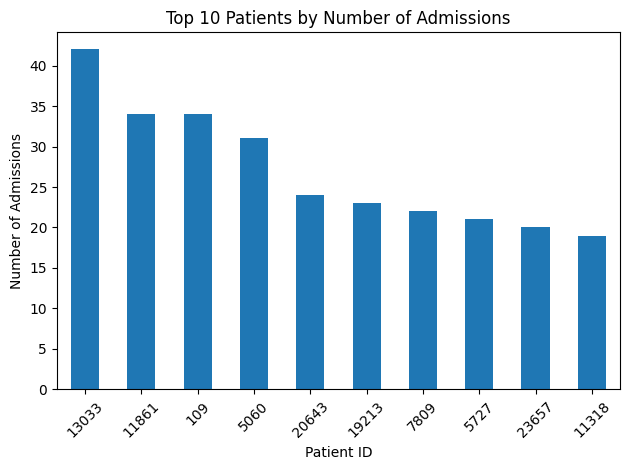

In [15]:
admission = dataframe_from_csv(os.path.join(mimic_path, 'ADMISSIONS.csv'),index_col=False)
admission.drop(columns=['ROW_ID','ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
                        'DISCHARGE_LOCATION', 'EDREGTIME', 'EDOUTTIME', 'HAS_CHARTEVENTS_DATA', 'HOSPITAL_EXPIRE_FLAG',
                        'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS'], inplace=True)
display(admission.head())
print(f"Shape of admission: {admission.shape}")
print(f"Number of unique admissions: {admission['HADM_ID'].nunique()}")
print(f"Number of unique patients in admission: {admission['SUBJECT_ID'].nunique()}")
#print patient that have multiple admissions
print(f"Number of patients with multiple admissions: {admission[admission.duplicated(['SUBJECT_ID'], keep=False)]['SUBJECT_ID'].nunique()}")
# Print number of patient with more than 10 admissions
print(f"Number of patients with more than 10 admissions: {admission[admission.duplicated(['SUBJECT_ID'], keep=False)].groupby('SUBJECT_ID').size()[lambda x: x > 10].count()}")

#show a graph of the 10 highest number of admissions per patient
admission_counts = admission['SUBJECT_ID'].value_counts().head(10)
admission_counts.plot(kind='bar')

plt.title('Top 10 Patients by Number of Admissions')
plt.xlabel('Patient ID')
plt.ylabel('Number of Admissions')
# x-axis rotation
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Full ICUStays Information

In [16]:
adm_pat_icu = pd.merge(patient_icu, admission, on='HADM_ID')
display(adm_pat_icu.head())
print(f"Shape of adm_pat_icu: {adm_pat_icu.shape}")

,SUBJECT_ID_x,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,LOS,GENDER,AGE,SUBJECT_ID_y,ETHNICITY,DIAGNOSIS
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,F,66,268,HISPANIC OR LATINO,DYSPNEA
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,M,40,269,WHITE,SEPSIS;PILONIDAL ABSCESS
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,M,80,270,UNKNOWN/NOT SPECIFIED,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600,F,46,271,PATIENT DECLINED TO ANSWER,GALLSTONE PANCREATITIS
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,M,67,272,WHITE,PULMONARY EMBOLIS


Shape of adm_pat_icu: (50641, 11)


In [17]:
adm_pat_icu.drop(columns=['SUBJECT_ID_y'], inplace=True)
col = ['SUBJECT_ID_x', 'HADM_ID', 'ICUSTAY_ID', 'GENDER', 'AGE', 'LOS', 'INTIME', 'OUTTIME', 'DIAGNOSIS','ETHNICITY']
adm_pat_icu = adm_pat_icu[col]
adm_pat_icu.columns = ['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'GENDER', 'AGE', 'LOS', 'INTIME', 'OUTTIME', 
                       'DIAGNOSIS', 'ETHNICITY']
display(adm_pat_icu.head())
print(f"Shape of adm_pat_icu after dropping columns: {adm_pat_icu.shape}")
print(f"Number of unique patients in adm_pat_icu: {adm_pat_icu['SUBJECT_ID'].nunique()}")

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE,LOS,INTIME,OUTTIME,DIAGNOSIS,ETHNICITY
0,268,110404,280836,F,66,3.2490,2198-02-14 23:27:38,2198-02-18 05:26:11,DYSPNEA,HISPANIC OR LATINO
1,269,106296,206613,M,40,3.2788,2170-11-05 11:05:29,2170-11-08 17:46:57,SEPSIS;PILONIDAL ABSCESS,WHITE
2,270,188028,220345,M,80,2.8939,2128-06-24 15:05:20,2128-06-27 12:32:29,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,UNKNOWN/NOT SPECIFIED
3,271,173727,249196,F,46,2.0600,2120-08-07 23:12:42,2120-08-10 00:39:04,GALLSTONE PANCREATITIS,PATIENT DECLINED TO ANSWER
4,272,164716,210407,M,67,1.6202,2186-12-25 21:08:04,2186-12-27 12:01:13,PULMONARY EMBOLIS,WHITE


Shape of adm_pat_icu after dropping columns: (50641, 10)
Number of unique patients in adm_pat_icu: 36548


In [18]:
# Transform gender in order to have numerical values
g_map = {'F': 1, 'M': 2}
def transform_gender(gender_series):
    global g_map
    return {'GENDER': gender_series.fillna('').apply(lambda s: g_map[s] if s in g_map else g_map[''])}

adm_pat_icu.update(transform_gender(adm_pat_icu.GENDER))
#display the first 5 rows of gender col of adm_pat_icu
display(adm_pat_icu['GENDER'].head())

0    1
1    2
2    2
3    1
4    2
Name: GENDER, dtype: object

In [19]:
#function to transform diagnosis into numerical values
def transform_dx_into_id(df):
    df['DIAGNOSIS'] = df['DIAGNOSIS'].fillna('nodx')
    dx_type = df.DIAGNOSIS.unique()
    dict_dx_key = pd.factorize(dx_type)[1]
    dict_dx_val = pd.factorize(dx_type)[0]
    dictionary  = dict(zip(dict_dx_key, dict_dx_val))
    df['DIAGNOSIS'] = df['DIAGNOSIS'].map(dictionary)
    return df

adm_pat_icu = transform_dx_into_id(adm_pat_icu)
display(adm_pat_icu.head())
print(f"Shape of adm_pat_icu after transforming diagnosis: {adm_pat_icu.shape}")    

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE,LOS,INTIME,OUTTIME,DIAGNOSIS,ETHNICITY
0,268,110404,280836,1,66,3.2490,2198-02-14 23:27:38,2198-02-18 05:26:11,0,HISPANIC OR LATINO
1,269,106296,206613,2,40,3.2788,2170-11-05 11:05:29,2170-11-08 17:46:57,1,WHITE
2,270,188028,220345,2,80,2.8939,2128-06-24 15:05:20,2128-06-27 12:32:29,2,UNKNOWN/NOT SPECIFIED
3,271,173727,249196,1,46,2.0600,2120-08-07 23:12:42,2120-08-10 00:39:04,3,PATIENT DECLINED TO ANSWER
4,272,164716,210407,2,67,1.6202,2186-12-25 21:08:04,2186-12-27 12:01:13,4,WHITE


Shape of adm_pat_icu after transforming diagnosis: (50641, 10)


In [20]:
def transform_ethn_into_id(df):
    df['ETHNICITY'] = df['ETHNICITY'].fillna('nodx')
    dx_type = df.ETHNICITY.unique()
    dict_dx_key = pd.factorize(dx_type)[1]
    dict_dx_val = pd.factorize(dx_type)[0]
    dictionary  = dict(zip(dict_dx_key, dict_dx_val))
    df['ETHNICITY'] = df['ETHNICITY'].map(dictionary)
    return df

adm_pat_icu = transform_ethn_into_id(adm_pat_icu)
display(adm_pat_icu.head())
print(f"Shape of adm_pat_icu after transforming ethnicity: {adm_pat_icu.shape}")

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE,LOS,INTIME,OUTTIME,DIAGNOSIS,ETHNICITY
0,268,110404,280836,1,66,3.2490,2198-02-14 23:27:38,2198-02-18 05:26:11,0,0
1,269,106296,206613,2,40,3.2788,2170-11-05 11:05:29,2170-11-08 17:46:57,1,1
2,270,188028,220345,2,80,2.8939,2128-06-24 15:05:20,2128-06-27 12:32:29,2,2
3,271,173727,249196,1,46,2.0600,2120-08-07 23:12:42,2120-08-10 00:39:04,3,3
4,272,164716,210407,2,67,1.6202,2186-12-25 21:08:04,2186-12-27 12:01:13,4,1


Shape of adm_pat_icu after transforming ethnicity: (50641, 10)


# Chart

In [21]:
# Define columns to drop
drop_cols = ['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'STORETIME', 'CGID', 'RESULTSTATUS', 'STOPPED', 'WARNING', 'ERROR']

# Prepare an empty list to collect filtered chunks
chart_chunks = []

# Use a reasonable chunk size (e.g., 300,000 rows)
chunk_size = 100000

for chunk in pd.read_csv(os.path.join(mimic_path, 'CHARTEVENTS.csv'), chunksize=chunk_size, low_memory=False):
    # Drop unwanted columns if present
    chunk = chunk.drop(columns=[col for col in drop_cols if col in chunk.columns], errors='ignore')
    # Keep only rows with non-null ICUSTAY_ID
    chunk = chunk[chunk['ICUSTAY_ID'].notnull()]
    # Convert ICUSTAY_ID to int
    chunk['ICUSTAY_ID'] = chunk['ICUSTAY_ID'].astype(int)
    chart_chunks.append(chunk)

# Concatenate all filtered chunks
chart = pd.concat(chart_chunks, ignore_index=True)
display(chart.head())
print(f"Shape of chart after filtering: {chart.shape}")
print(f"Number of unique ICUSTAY_IDs in chart: {chart['ICUSTAY_ID'].nunique()}")
print(f"Number of unique ITEMIDs in chart: {chart['ITEMID'].nunique()}")

,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM
0,241249,223834,2134-05-12 12:00:00,15.0,15.00,L/min
1,241249,223835,2134-05-12 12:00:00,100.0,100.00,NaN
2,241249,224328,2134-05-12 12:00:00,0.37,0.37,NaN
3,241249,224329,2134-05-12 12:00:00,6.0,6.00,min
4,241249,224330,2134-05-12 12:00:00,2.5,2.50,NaN


Shape of chart after filtering: (330414954, 6)
Number of unique ICUSTAY_IDs in chart: 60840
Number of unique ITEMIDs in chart: 6457


In [22]:
display(chart.head())

,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM
0,241249,223834,2134-05-12 12:00:00,15.0,15.00,L/min
1,241249,223835,2134-05-12 12:00:00,100.0,100.00,NaN
2,241249,224328,2134-05-12 12:00:00,0.37,0.37,NaN
3,241249,224329,2134-05-12 12:00:00,6.0,6.00,min
4,241249,224330,2134-05-12 12:00:00,2.5,2.50,NaN


# Find ICUStays with Delirium

In [23]:
items = [228300, 228301, 228302, 228303, 228332, 228334, 228335, 228336, 228337]
delirium = chart[chart.ITEMID.isin(items)]
delirium.loc[:, 'ICUSTAY_ID'] = delirium['ICUSTAY_ID'].astype(int)
icustay_delirium = delirium.ICUSTAY_ID.unique()
chart = chart[chart['ICUSTAY_ID'].isin(icustay_delirium)]
display(delirium.head())
print(f"Shape of delirium: {delirium.shape}")
print(f"Number of unique ICUSTAY_IDs in delirium: {delirium['ICUSTAY_ID'].nunique()}")
# unique VALUE
print(f"Unique values in VALUE column of delirium: {delirium['VALUE'].unique()}")

,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM
260934870,268437,228332,2165-12-30 08:00:00,Negative,NaN,NaN
260934871,268437,228337,2165-12-30 08:00:00,No,0.0,NaN
260935129,222647,228332,2179-05-07 12:10:00,Negative,NaN,NaN
260935130,222647,228337,2179-05-07 12:10:00,No,0.0,NaN
260936702,215359,228303,2150-08-03 22:11:00,No,NaN,NaN


Shape of delirium: (119706, 6)
Number of unique ICUSTAY_IDs in delirium: 7689
Unique values in VALUE column of delirium: ['Negative' 'No' 'No (Stop - Not delirious)' 'Positive' 'Yes' 'UTA'
 'Unable to Assess' 'Yes (Continue)'
 'Yes (3 or more errors, then Continue)' 'Unable to Assess (Stop)'
 'No (less than 3 errors - Stop - Not delirious)']


# D_ITEM - LABEL for other Tables

In [24]:
d_item = dataframe_from_csv(os.path.join(mimic_path, 'D_ITEMS.csv'),index_col=False)
d_item.drop(columns=['ABBREVIATION', 'CATEGORY', 'UNITNAME', 'CONCEPTID', 'ROW_ID', 'DBSOURCE', 'LINKSTO',
                     'PARAM_TYPE'], inplace=True) 

In [26]:
# filter d_item to keep only relevant ITEMIDs that are in items list
d_item_delirium = d_item[d_item['ITEMID'].isin(items)]
display(d_item_delirium)
print(f"Shape of d_item_delirium: {d_item_delirium.shape}")
print(f"Number of unique labels in d_item_delirium: {d_item_delirium['LABEL'].nunique()}")

,ITEMID,LABEL
8830,228300,CAM-ICU MS change
8831,228301,CAM-ICU Inattention
8832,228302,CAM-ICU RASS LOC
8833,228303,CAM-ICU Disorganized thinking
9514,228332,Delirium assessment
9515,228334,CAM-ICU Altered LOC
9516,228335,CAM-ICU Disorganized thinking
9517,228336,CAM-ICU Inattention
9518,228337,CAM-ICU MS Change


Shape of d_item_delirium: (9, 2)
Number of unique labels in d_item_delirium: 7


# Add Item_id to chart 

In [27]:
chart = pd.merge(chart, d_item, on='ITEMID')
display(chart.head())
print(f"Shape of chart after merging with d_item: {chart.shape}")
print(f"Number of unique ICUSTAY_IDs in chart after merging: {chart['ICUSTAY_ID'].nunique()}")

,ICUSTAY_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,LABEL
0,291697,223751,2167-07-26 16:58:00,160.0,160.0,mmHg,Non-Invasive Blood Pressure Alarm - High
1,291697,223752,2167-07-26 16:58:00,90.0,90.0,mmHg,Non-Invasive Blood Pressure Alarm - Low
2,291697,223769,2167-07-26 16:58:00,100.0,100.0,%,O2 Saturation Pulseoxymetry Alarm - High
3,291697,223770,2167-07-26 16:58:00,92.0,92.0,%,O2 Saturation Pulseoxymetry Alarm - Low
4,291697,224161,2167-07-26 16:58:00,35.0,35.0,insp/min,Resp Alarm - High


Shape of chart after merging with d_item: (39657694, 7)
Number of unique ICUSTAY_IDs in chart after merging: 7689


In [28]:
chart.to_csv(os.path.join(data_path, 'chartevent.csv'),index=False)

# Load Chart with Delirium ICU_Stays

In [ ]:
chart = pd.read_csv(os.path.join(data_path,'chartevent.csv'))#

C:\Users\URHU\AppData\Local\Temp\ipykernel_17872\1054262376.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  chart = pd.read_csv(os.path.join(data_path,'chartevent.csv'))#


# ICU-Stay shared between admission and chart 

In [29]:
icu_adm = adm_pat_icu.ICUSTAY_ID.unique()
icu_chart = chart.ICUSTAY_ID.unique()

In [30]:
def intersection(lst1, lst2): 
    lst3 = list(set(lst1).intersection(set(lst2)))
    return lst3 

In [31]:
icustay_delirium = intersection(icu_adm, icu_chart)

In [32]:
chart = chart[chart['ICUSTAY_ID'].isin(icustay_delirium)]

In [33]:
chart.loc[chart['VALUE'] == 'No'       , 'VALUENUM'] = 0
chart.loc[chart['VALUE'] == 'Negative' , 'VALUENUM'] = 0
chart.loc[chart['VALUE'] == 'No (Stop - Not delirious)' , 'VALUENUM'] = 0
chart.loc[chart['VALUE'] == 'Yes'     , 'VALUENUM'] = 1
chart.loc[chart['VALUE'] == 'Positive', 'VALUENUM'] = 1
chart.loc[chart['VALUE'] == 'Yes (Continue)', 'VALUENUM'] = 1
chart.loc[chart['VALUE'] == 'UTA'             , 'VALUENUM'] = 2
chart.loc[chart['VALUE'] == 'Unable to Assess', 'VALUENUM'] = 2
chart.loc[chart['VALUE'] == 'Unable to Assess (Stop)', 'VALUENUM'] = 2
chart.loc[chart['VALUE'] == 'No (less than 3 errors - Stop - Not delirious)', 'VALUENUM'] = 3
chart.loc[chart['VALUE'] == 'Yes (3 or more errors, then Continue)', 'VALUENUM'] = 4

In [34]:
chart.drop(columns=['VALUE'], inplace=True)
chart = chart[chart['VALUENUM'].notnull()]

In [35]:
chart.shape

(20189413, 6)

In [36]:
chart.CHARTTIME = pd.to_datetime(chart.CHARTTIME)
chart.VALUEUOM = chart.VALUEUOM.fillna('').astype(str)
col = ['ICUSTAY_ID', 'ITEMID', 'LABEL', 'VALUENUM', 'VALUEUOM', 'CHARTTIME']
chart = chart[col]
chart.columns = ['ICUSTAY_ID', 'ITEMID', 'LABEL', 'VALUE', 'VALUEUOM', 'CHARTTIME']
chart[['ICUSTAY_ID']] = chart[['ICUSTAY_ID']].astype(int)

In [37]:
# Function to check and convert values in the 'VALUE' column
def check(x):
    try:
        x = float(str(x).strip())
    except:
        x = np.nan
    return x
# Function to apply the check function to the 'VALUE' column
def check_itemvalue(df):
    df['VALUE'] = df['VALUE'].apply(lambda x: check(x))
    df['VALUE'] = df.VALUE.astype(float)
    return df

In [38]:
chart = check_itemvalue(chart)
chart = chart.loc[chart.VALUE.notnull()]

In [39]:
chart_features = [ 
       'Delirium assessment',
       'CAM-ICU Inattention',
       'CAM-ICU Altered LOC',
       'CAM-ICU MS Change',
       'CAM-ICU MS change',
       'CAM-ICU RASS LOC',
       'CAM-ICU Disorganized thinking',
       'Admission Weight (Kg)' , 'Admission Weight (lbs.)', #Weight
       'Height (cm)', 'Admit Ht', 'Height Inches', 'Length Calc Inches', 'Length in Inches', 
       'Length Calc (cm)', 'Length in cm', #Height
       'O2 saturation pulseoxymetry', 'Arterial O2 Saturation', 'SpO2', # O2 Saturation
       'Heart Rate', #Heart
       'Temperature Fahrenheit', 'Temperature F', 'Temperature F (calc)', #Temperature
       'Temperature C (calc)', 'Temperature C', 'Temperature Celsius', #Temperatur
       'BUN', 'BUN (6-20)', #BUN
       'Glucose','Glucose (serum)','Glucose finger stick','Glucose (whole blood)','Glucose (70-105)',
       'Fingerstick Glucose', #Glucose
       'Hemoglobin', # serum hemoglobin
       'Platelets', #Platelets  
       'Inspired O2 Fraction', 'FiO2', # FiO2
       'Richmond-RAS Scale', 'Goal Richmond-RAS Scale', # Sedation Scor
       'Non Invasive Blood Pressure systolic', 'NBP [Systolic]',
       'Non Invasive Blood Pressure diastolic', 'NBP [Diastolic]',
       'Non Invasive Blood Pressure mean', 'NBP Mean',
       'Arterial Blood Pressure mean', 'Arterial BP Mean', 'ART BP mean',
       'Arterial Blood Pressure systolic', 'ART BP Systolic', 'Arterial BP [Systolic]',
       'Arterial Blood Pressure diastolic', 'Arterial BP [Diastolic]', 'ART BP Diastolic',
       'Arterial O2 pressure', 'Arterial PaO2', 'PAO2', #PaO2
       'Arterial CO2 Pressure', 'Arterial PaCO2', 'pCO2', 'pCO2 (other)', 'PCO2', 'Arterial PaCO2', #PaCo2
       'Respiratory Rate', #Respiratory    
       'PH (Arterial)','Arterial pH', 'Art.pH', 'pH (Art)', #pH      
       'GCS Total',
       'GCS - Eye Opening', 'Eye Opening',
       'GCS - Motor Response', 'Motor Response',
       'GCS - Verbal Response', 'Verbal Response',
       'TSH NML(0.27-4.2)', 'TSH  (NML 0.27-4.2)', #TSH
       'Serum Osmolality',
       'Ammonia', 'ammonia', 'AMMONIA', 'AMMONIA/12-47 UMOL/L',
       'Cortisol', 'cortisol',
       'ETCO2', 'EtCO2', 'EtCO2 Clinical indication',
       'dexmedetomidine', 'Dexmedetomidine',
       'Morphine Sulfate',
       'propofol', 'Propofol (Intubation)',
       'Midazolam/Versed', 'Midazolam',
       'Lorazepam/Ativan',
       'Fentanyl', 'fentanyl mg/hr', 'Fentanyl:', 'fentanyl',
       'Cardiac Index', 'CI (PiCCO)', 'Cardiac Index (CI NICOM)', 'cardiac index o',  #CI
       'Intra Cranial Pressure', 'Intra Cranial Pressure #2' ]


In [40]:
chart = chart[chart['LABEL'].isin(chart_features)]

In [41]:
chart[chart['LABEL'] == 'Admission Weight (Kg)'].shape

(7005, 6)

In [42]:
# lbs to Kg
chart.loc[chart['LABEL'] == 'Admission Weight (lbs.)' , 'VALUE'] = chart['VALUE'] * 0.45

# Inch to CM
chart.loc[chart['ITEMID'] == 920  , 'VALUE'] = chart['VALUE'] * 2.54
chart.loc[chart['ITEMID'] == 1394 , 'VALUE'] = chart['VALUE'] * 2.54
chart.loc[chart['ITEMID'] == 4187 , 'VALUE'] = chart['VALUE'] * 2.54
chart.loc[chart['ITEMID'] == 3486 , 'VALUE'] = chart['VALUE'] * 2.54

In [43]:
# Unifying several variables into one

# Weight
chart.loc[chart['LABEL'] == 'Admission Weight (Kg)'  , 'LABEL'] = 'Weight'
chart.loc[chart['LABEL'] == 'Admission Weight (lbs.)', 'LABEL'] = 'Weight'
# Height
chart.loc[chart['LABEL'] == 'Height (cm)'       , 'LABEL'] = 'Height'
chart.loc[chart['LABEL'] == 'Admit Ht'          , 'LABEL'] = 'Height'
chart.loc[chart['LABEL'] == 'Height Inches'     , 'LABEL'] = 'Height'
chart.loc[chart['LABEL'] == 'Length Calc Inches', 'LABEL'] = 'Height'
chart.loc[chart['LABEL'] == 'Length in Inches'  , 'LABEL'] = 'Height'
chart.loc[chart['LABEL'] == 'Length Calc (cm)'  , 'LABEL'] = 'Height'
chart.loc[chart['LABEL'] == 'Length in cm'      , 'LABEL'] = 'Height' 
# O2 Saturation
chart.loc[chart['LABEL'] == 'Arterial O2 Saturation'     , 'LABEL'] = 'Oxygen Saturation'
chart.loc[chart['LABEL'] == 'O2 saturation pulseoxymetry', 'LABEL'] = 'Oxygen Saturation'
chart.loc[chart['LABEL'] == 'SpO2', 'LABEL'] = 'Oxygen Saturation'
#Temperature
chart.loc[chart['LABEL'] == 'Temperature Fahrenheit', 'LABEL'] = 'Temperature F'
chart.loc[chart['LABEL'] == 'Temperature F (calc)'  , 'LABEL'] = 'Temperature F'

chart.loc[chart['LABEL'] == 'Temperature C (calc)'  , 'LABEL'] = 'Temperature C'
chart.loc[chart['LABEL'] == 'Temperature Celsius'  , 'LABEL'] = 'Temperature C'
# BUN
chart.loc[chart['LABEL'] == 'BUN (6-20)', 'LABEL'] = 'BUN'
# Glucose
chart.loc[chart['LABEL'] == 'Glucose (serum)'      , 'LABEL'] = 'Glucose'
chart.loc[chart['LABEL'] == 'Glucose finger stick' , 'LABEL'] = 'Glucose'
chart.loc[chart['LABEL'] == 'Glucose (whole blood)', 'LABEL'] = 'Glucose'
chart.loc[chart['LABEL'] == 'Glucose (70-105)'     , 'LABEL'] = 'Glucose'
chart.loc[chart['LABEL'] == 'Fingerstick Glucose'  , 'LABEL'] = 'Glucose'
chart.loc[chart['LABEL'] == 'Non Invasive Blood Pressure systolic' , 'LABEL'] = 'NBP [Systolic]'
chart.loc[chart['LABEL'] == 'Non Invasive Blood Pressure diastolic', 'LABEL'] = 'NBP [Diastolic]'
chart.loc[chart['LABEL'] == 'Non Invasive Blood Pressure mean'     , 'LABEL'] = 'NBP Mean'
chart.loc[chart['LABEL'] == 'Arterial Blood Pressure mean', 'LABEL'] = 'ART BP mean'
chart.loc[chart['LABEL'] == 'Arterial BP Mean'            , 'LABEL'] = 'ART BP mean'
chart.loc[chart['LABEL'] == 'Arterial Blood Pressure systolic', 'LABEL'] = 'ART BP Systolic'
chart.loc[chart['LABEL'] == 'Arterial BP [Systolic]'          , 'LABEL'] = 'ART BP Systolic'
chart.loc[chart['LABEL'] == 'Arterial Blood Pressure diastolic', 'LABEL'] = 'ART BP Diastolic'
chart.loc[chart['LABEL'] == 'Arterial BP [Diastolic]'          , 'LABEL'] = 'ART BP Diastolic'
chart.loc[chart['LABEL'] == 'Resp Rate (Spont)'    , 'LABEL'] = 'Respiratory Rate (spontaneous)'
chart.loc[chart['LABEL'] == 'Respiratory Rate Set' , 'LABEL'] = 'Respiratory Rate (Set)'
chart.loc[chart['LABEL'] == 'Resp Rate (Total)'    , 'LABEL'] = 'Respiratory Rate (Total)'
chart.loc[chart['LABEL'] == 'PH (Arterial)', 'LABEL'] = 'pH'
chart.loc[chart['LABEL'] == 'Arterial pH'  , 'LABEL'] = 'pH'
chart.loc[chart['LABEL'] == 'Art.pH'       , 'LABEL'] = 'pH' 
chart.loc[chart['LABEL'] == 'pH (Art)'  , 'LABEL'] = 'pH'
chart.loc[chart['LABEL'] == 'Eye Opening'    , 'LABEL'] = 'GCS - Eye Opening'
chart.loc[chart['LABEL'] == 'Motor Response' , 'LABEL'] = 'GCS - Motor Response'
chart.loc[chart['LABEL'] == 'Verbal Response', 'LABEL'] = 'GCS - Verbal Response'
chart.loc[chart['LABEL'] == 'Pain Level'     , 'LABEL'] = 'Pain Level Response'
chart.loc[chart['LABEL'] == 'Calcium (8.4-10.2)' , 'LABEL'] = 'Calcium'
chart.loc[chart['LABEL'] == 'Magnesium (1.6-2.6)', 'LABEL'] = 'Magnesium'
chart.loc[chart['LABEL'] == 'Arterial Base Excess', 'LABEL'] = 'Base Excess'
chart.loc[chart['LABEL'] == 'Arterial CO2(Calc)', 'LABEL'] = 'Total CO2'
chart.loc[chart['LABEL'] == 'Carbon Dioxide',     'LABEL'] = 'Total CO2'  
chart.loc[chart['LABEL'] == 'Anion gap', 'LABEL'] = 'Anion Gap'
chart.loc[chart['LABEL'] == 'O2 Flow (additional cannula)', 'LABEL'] = 'O2 Flow'
chart.loc[chart['LABEL'] == 'Arterial PaCO2',        'LABEL'] = 'PaCO2'
chart.loc[chart['LABEL'] == 'Arterial CO2 Pressure', 'LABEL'] = 'PaCO2'
chart.loc[chart['LABEL'] == 'pCO2',                  'LABEL'] = 'PaCO2'
chart.loc[chart['LABEL'] == 'pCO2 (other)',          'LABEL'] = 'PaCO2'
chart.loc[chart['LABEL'] == 'PCO2',                  'LABEL'] = 'PaCO2'
chart.loc[chart['LABEL'] == 'Arterial PaCO2',        'LABEL'] = 'PaCO2'
chart.loc[chart['LABEL'] == 'Arterial PaO2',        'LABEL'] = 'PaO2' 
chart.loc[chart['LABEL'] == 'Arterial O2 pressure', 'LABEL'] = 'PaO2'
chart.loc[chart['LABEL'] == 'PAO2',                 'LABEL'] = 'PaO2'
chart.loc[chart['LABEL'] == 'Inspired O2 Fraction', 'LABEL'] = 'FiO2'
chart.loc[chart['LABEL'] == 'Richmond-RAS Scale'      , 'LABEL'] = 'Sedation Score'
chart.loc[chart['LABEL'] == 'Goal Richmond-RAS Scale' , 'LABEL'] = 'Sedation Score'
chart.loc[chart['LABEL'] == 'Cardiac Index'   , 'LABEL'] = 'CI'
chart.loc[chart['LABEL'] == 'CI (PiCCO)'      , 'LABEL'] = 'CI'
chart.loc[chart['LABEL'] == 'cardiac index o'   , 'LABEL'] = 'CI'
chart.loc[chart['LABEL'] == 'Cardiac Index (CI NICOM)'  , 'LABEL'] = 'CI'  
chart.loc[chart['LABEL'] == 'Intra Cranial Pressure'      , 'LABEL'] = 'ICP'
chart.loc[chart['LABEL'] == 'Intra Cranial Pressure #2'   , 'LABEL'] = 'ICP'
chart.loc[chart['LABEL'] == 'TSH NML(0.27-4.2)'      , 'LABEL'] = 'TSH' 
chart.loc[chart['LABEL'] == 'TSH  (NML 0.27-4.2)'    , 'LABEL'] = 'TSH'
chart.loc[chart['LABEL'] == 'Serum Osmolality'    , 'LABEL'] = 'Osmolality'
chart.loc[chart['LABEL'] == 'ammonia',               'LABEL'] = 'Ammonia' 
chart.loc[chart['LABEL'] == 'AMMONIA',               'LABEL'] = 'Ammonia'
chart.loc[chart['LABEL'] == 'AMMONIA/12-47 UMOL/L',  'LABEL'] = 'Ammonia'
chart.loc[chart['LABEL'] == 'cortisol',    'LABEL'] = 'Cortisol' 
chart.loc[chart['LABEL'] == 'EtCO2',                      'LABEL'] = 'ETCO2' 
chart.loc[chart['LABEL'] == 'EtCO2 Clinical indication',  'LABEL'] = 'ETCO2'
chart.loc[chart['LABEL'] == 'dexmedetomidine',  'LABEL'] = 'Dexmedetomidine'  
chart.loc[chart['LABEL'] == 'propofol',               'LABEL'] = 'Propofol' 
chart.loc[chart['LABEL'] == 'Propofol (Intubation)',  'LABEL'] = 'Propofol'
chart.loc[chart['LABEL'] == 'Midazolam/Versed',  'LABEL'] = 'Midazolam'  
chart.loc[chart['LABEL'] == 'Midazolam',         'LABEL'] = 'Midazolam'
chart.loc[chart['LABEL'] == 'Lorazepam/Ativan',   'LABEL'] = 'Lorazepam'
chart.loc[chart['LABEL'] == 'fentanyl mg/hr',  'LABEL'] = 'Fentanyl' 
chart.loc[chart['LABEL'] == 'fentanyl',        'LABEL'] = 'Fentanyl'
chart.loc[chart['LABEL'] == 'Fentanyl:',       'LABEL'] = 'Fentanyl'

# LAB Events

In [44]:
lab = dataframe_from_csv(os.path.join(mimic_path, 'LABEVENTS.csv'),index_col=False)
lab.drop(columns=['ROW_ID', 'VALUENUM', 'FLAG'], inplace=True)

In [45]:
d_lab = dataframe_from_csv(os.path.join(mimic_path, 'D_LABITEMS.csv'),index_col=False)
d_lab.drop(columns=['ROW_ID', 'FLUID', 'CATEGORY', 'LOINC_CODE'], inplace=True)

In [46]:
lab_dlab = pd.merge(lab, d_lab, on='ITEMID')
lab_dlab.VALUEUOM = lab_dlab.VALUEUOM.fillna('').astype(str)
lab_dlab = lab_dlab.loc[lab_dlab.VALUE.notnull()]

In [47]:
lab_dlab.head()

,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUEUOM,LABEL
0,3,NaN,50820,2101-10-12 16:07:00,7.39,units,pH
1,3,NaN,50800,2101-10-12 18:17:00,ART,,SPECIMEN TYPE
2,3,NaN,50802,2101-10-12 18:17:00,-1,mEq/L,Base Excess
3,3,NaN,50804,2101-10-12 18:17:00,22,mEq/L,Calculated Total CO2
4,3,NaN,50808,2101-10-12 18:17:00,0.93,mmol/L,Free Calcium


In [48]:
lab_dlab.shape

(27852706, 7)

# Add icu-stay to Lab events

In [49]:
chunk_size = 100000  # You can adjust this as needed
icu_lab_chunks = []

# Get unique SUBJECT_IDs from adm_pat_icu
subject_ids = adm_pat_icu['SUBJECT_ID'].unique()

for i in range(0, len(subject_ids), chunk_size):
    chunk_subjects = subject_ids[i:i+chunk_size]
    lab_chunk = lab_dlab[lab_dlab['SUBJECT_ID'].isin(chunk_subjects)]
    adm_chunk = adm_pat_icu[adm_pat_icu['SUBJECT_ID'].isin(chunk_subjects)]
    merged_chunk = pd.merge(lab_chunk, adm_chunk, how='right', on=['SUBJECT_ID'])
    icu_lab_chunks.append(merged_chunk)

icu_lab = pd.concat(icu_lab_chunks, ignore_index=True)

In [50]:
icu_lab.INTIME    = pd.to_datetime(icu_lab.INTIME)
icu_lab.OUTTIME   = pd.to_datetime(icu_lab.OUTTIME)
icu_lab.CHARTTIME = pd.to_datetime(icu_lab.CHARTTIME)

In [51]:
# Filter icu_lab to keep only rows where CHARTTIME is between INTIME and OUTTIME
icu_lab = icu_lab[(icu_lab['CHARTTIME'] > icu_lab['INTIME']) & (icu_lab['CHARTTIME'] < icu_lab['OUTTIME'])]

In [52]:
icu_lab.drop(columns=['SUBJECT_ID', 'HADM_ID_y', 'HADM_ID_x', 'GENDER', 'AGE', 'LOS', 'INTIME', 'OUTTIME', 
                      'DIAGNOSIS', 'ETHNICITY'], inplace=True)
icu_lab[['ITEMID']] = icu_lab[['ITEMID']].astype(int)
col = ['ICUSTAY_ID', 'ITEMID', 'LABEL', 'VALUE', 'VALUEUOM', 'CHARTTIME']
icu_lab = icu_lab[col]

In [53]:
icu_lab = check_itemvalue(icu_lab)
icu_lab = icu_lab.loc[icu_lab.VALUE.notnull()]

In [54]:
icu_lab.head()

,ICUSTAY_ID,ITEMID,LABEL,VALUE,VALUEUOM,CHARTTIME
0,280836,51093,"Osmolality, Urine",374.0,mOsm/kg,2198-02-16 10:48:00
5,280836,51476,Epithelial Cells,0.0,#/hpf,2198-02-16 10:48:00
7,280836,51479,Granular Casts,10.0,#/lpf,2198-02-16 10:48:00
8,280836,51482,Hyaline Casts,86.0,#/lpf,2198-02-16 10:48:00
12,280836,51491,pH,5.0,units,2198-02-16 10:48:00


In [55]:
icu_lab.shape

(11171987, 6)

In [56]:
icu_lab['LABEL'].unique()

array(['Osmolality, Urine', 'Epithelial Cells', 'Granular Casts',
       'Hyaline Casts', 'pH', 'Protein', 'RBC', 'Specific Gravity', 'WBC',
       'Base Excess', 'Calculated Total CO2', 'Oxygen', 'pCO2', 'PEEP',
       'pO2', 'Temperature', 'Tidal Volume', 'Free Calcium', 'Glucose',
       'Potassium, Whole Blood', 'Anion Gap', 'Bicarbonate',
       'Calcium, Total', 'Chloride', 'Cortisol', 'Creatine Kinase (CK)',
       'Creatine Kinase, MB Isoenzyme', 'Creatinine', 'Magnesium',
       'Phosphate', 'Potassium', 'Sodium', 'Thyroxine (T4), Free',
       'Urea Nitrogen', 'Hematocrit', 'Hemoglobin', 'MCH', 'MCHC', 'MCV',
       'Platelet Count', 'RDW', 'Red Blood Cells', 'White Blood Cells',
       'Lactate', 'Albumin', 'Vancomycin', 'Atypical Lymphocytes',
       'Bands', 'Basophils', 'Eosinophils', 'INR(PT)', 'Lymphocytes',
       'Metamyelocytes', 'Monocytes', 'Myelocytes', 'Neutrophils',
       'Nucleated Red Cells', 'PT', 'PTT', 'Oxygen Saturation',
       'Alveolar-arterial Gradien

In [57]:
icu_lab.head()

,ICUSTAY_ID,ITEMID,LABEL,VALUE,VALUEUOM,CHARTTIME
0,280836,51093,"Osmolality, Urine",374.0,mOsm/kg,2198-02-16 10:48:00
5,280836,51476,Epithelial Cells,0.0,#/hpf,2198-02-16 10:48:00
7,280836,51479,Granular Casts,10.0,#/lpf,2198-02-16 10:48:00
8,280836,51482,Hyaline Casts,86.0,#/lpf,2198-02-16 10:48:00
12,280836,51491,pH,5.0,units,2198-02-16 10:48:00


# Filter Lab Event based on Delirium icustay  and Features

In [58]:
icu_lab = icu_lab[icu_lab['ICUSTAY_ID'].isin(icustay_delirium)]

In [59]:
icu_lab[icu_lab['LABEL'].str.contains('Chloride')].shape

(52945, 6)

In [60]:
icu_lab_features = [
#Oxygen Saturation
        'Oxygen Saturation', 
#WBC
       'White Blood Cells', 'WBC', 'WBC Count', 
#Sodium
       'Sodium', 'Sodium, Whole Blood', 
# blood urea nitrogen (BUN)
        'Urea Nitrogen',
#Glucose   
    'Glucose', 
#Bilirubin
    'Bilirubin, Direct',# 'Bilirubin, Indirect', 'Bilirubin, Total', 
#Hemoglobin   
    'Hemoglobin',   
#Platelet
    'Platelet Count',
# Potassium
    'Potassium', 'Potassium, Whole Blood', 
# chloride
    'Chloride', 'Chloride, Whole Blood',
# Bicarbonate
       'Bicarbonate',
# Creatinine
       'Creatinine', 
# ALT
        'Alanine Aminotransferase (ALT)',
# AST
       'Asparate Aminotransferase (AST)', 
# Alkaline
       'Alkaline Phosphatase',
    'Thyroid Stimulating Hormone', #TSH
       'Osmolality, Measured', #serum osmolality
       'Carboxyhemoglobin', #Carboxyhemoglobin
       'SaO2', #Oxyhemoglobin
       'Methemoglobin', #Methemoglobin
       'Ammonia', #Ammonia
       'Cortisol', #Cortisol
       'Lactate', #Lactate
       'pH', #pH
       'pCO2', #pCO2
       'pO2' #pO2
]

In [61]:
icu_lab = icu_lab[icu_lab['LABEL'].isin(icu_lab_features)]

In [62]:
icu_lab[icu_lab['LABEL'] == 'Hemoglobin'].shape

(42457, 6)

In [63]:
icu_lab.shape

(670376, 6)

## Unifying variables with more than one nam

In [64]:
icu_lab.loc[icu_lab['LABEL'] == 'White Blood Cells'     , 'LABEL'] = 'WBC'
icu_lab.loc[icu_lab['LABEL'] == 'WBC Count'             , 'LABEL'] = 'WBC'
#Sodium
icu_lab.loc[icu_lab['LABEL'] == 'Sodium, Whole Blood'   , 'LABEL'] = 'Sodium'
# blood urea nitrogen (BUN)
icu_lab.loc[icu_lab['LABEL'] == 'Urea Nitrogen'   , 'LABEL'] = 'BUN'
#Bilirubin
icu_lab.loc[icu_lab['LABEL'] == 'Bilirubin, Direct'     , 'LABEL'] = 'direct bilirubin'
icu_lab.loc[icu_lab['LABEL'] == 'Hematocrit'      , 'LABEL'] = 'Hemoglobin'
#Platelet
icu_lab.loc[icu_lab['LABEL'] == 'Platelet Count'      , 'LABEL'] = 'Platelets'
# Potassium
icu_lab.loc[icu_lab['LABEL'] == 'Potassium, Whole Blood', 'LABEL'] = 'Potassium'
# chloride
icu_lab.loc[icu_lab['LABEL'] == 'Chloride, Whole Blood' , 'LABEL'] = 'Chloride'
# ALT
icu_lab.loc[icu_lab['LABEL'] == 'Alanine Aminotransferase (ALT)' , 'LABEL'] = 'ALT'
# AST
icu_lab.loc[icu_lab['LABEL'] == 'Asparate Aminotransferase (AST)', 'LABEL'] = 'AST'
# Alkaline
icu_lab.loc[icu_lab['LABEL'] == 'Alkaline Phosphatase'  , 'LABEL'] = 'Alkaline Phosphate'
icu_lab.loc[icu_lab['LABEL'] == 'Myelocytes'            , 'LABEL'] = 'Metamyelocytes'
icu_lab.loc[icu_lab['LABEL'] == 'Calcium, Total'        , 'LABEL'] = 'Calcium'
icu_lab.loc[icu_lab['LABEL'] == 'Platelet Count'        , 'LABEL'] = 'Platelets'
icu_lab.loc[icu_lab['LABEL'] == 'Red Blood Cells'       , 'LABEL'] = 'RBC'  
icu_lab.loc[icu_lab['LABEL'] == 'pCO2'                  , 'LABEL'] = 'PaCO2'
icu_lab.loc[icu_lab['LABEL'] == 'pO2'                   , 'LABEL'] = 'PaO2'
icu_lab.loc[icu_lab['LABEL'] == 'Calculated Total CO2'  , 'LABEL'] = 'Total CO2'
icu_lab.loc[icu_lab['LABEL'] == 'Basophils'             , 'LABEL'] = 'Differential-Basos'
icu_lab.loc[icu_lab['LABEL'] == 'Eosinophils'           , 'LABEL'] = 'Differential-Eos'
icu_lab.loc[icu_lab['LABEL'] == 'Lymphocytes'           , 'LABEL'] = 'Differential-Lymphs'
icu_lab.loc[icu_lab['LABEL'] == 'Monocytes'             , 'LABEL'] = 'Differential-Monos'
icu_lab.loc[icu_lab['LABEL'] == 'Osmolality, Measured'  , 'LABEL'] = 'Osmolality'
icu_lab.loc[icu_lab['LABEL'] == 'SaO2'                  , 'LABEL'] = 'Oxyhemoglobin'

icu_lab.loc[icu_lab['LABEL'] == 'Thyroid Stimulating Hormone'    , 'LABEL'] = 'TSH'

In [65]:
icu_lab.head()

,ICUSTAY_ID,ITEMID,LABEL,VALUE,VALUEUOM,CHARTTIME
21115,246725,50882,Bicarbonate,23.0,mEq/L,2107-09-14 00:46:00
21117,246725,50902,Chloride,98.0,mEq/L,2107-09-14 00:46:00
21118,246725,50912,Creatinine,0.5,mg/dL,2107-09-14 00:46:00
21119,246725,50931,Glucose,138.0,mg/dL,2107-09-14 00:46:00
21122,246725,50971,Potassium,4.5,mEq/L,2107-09-14 00:46:00


In [66]:
icu_lab.shape

(670376, 6)

In [67]:
icu_lab.LABEL.unique()

array(['Bicarbonate', 'Chloride', 'Creatinine', 'Glucose', 'Potassium',
       'Sodium', 'BUN', 'TSH', 'Hemoglobin', 'Platelets', 'WBC', 'ALT',
       'Alkaline Phosphate', 'AST', 'Lactate', 'PaCO2', 'pH', 'PaO2',
       'Oxygen Saturation', 'direct bilirubin', 'Osmolality', 'Cortisol',
       'Carboxyhemoglobin', 'Methemoglobin', 'Ammonia'], dtype=object)

In [68]:
icu_lab.to_csv(os.path.join(data_path, 'icu_lab.csv'),index=False)

# Input-MV

In [69]:
input_mv = dataframe_from_csv(os.path.join(mimic_path, 'INPUTEVENTS_MV.csv'),index_col=False)
input_mv.drop(columns=['ORIGINALRATE', 'ORIGINALAMOUNT', 'COMMENTS_DATE', 'COMMENTS_CANCELEDBY', 'COMMENTS_EDITEDBY',
                       'CGID', 'RATE', 'RATEUOM', 'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME', 'LINKORDERID',
                       'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION', 'CONTINUEINNEXTDEPT', 'ORDERID',
                       'CANCELREASON', 'STATUSDESCRIPTION', 'ISOPENBAG', 'STORETIME', 'ENDTIME', 'ROW_ID','HADM_ID',
                       'SUBJECT_ID'], inplace=True)

In [70]:
input_mv.head()

,ICUSTAY_ID,STARTTIME,ITEMID,AMOUNT,AMOUNTUOM,PATIENTWEIGHT,TOTALAMOUNT,TOTALAMOUNTUOM
0,223259.0,2133-02-05 06:29:00,225166,6.774532,mEq,83.2,100.0,ml
1,223259.0,2133-02-05 05:34:00,225944,28.132997,ml,83.2,100.0,ml
2,223259.0,2133-02-05 05:34:00,225166,2.813300,mEq,83.2,100.0,ml
3,223259.0,2133-02-03 12:00:00,225893,1.000000,dose,83.2,100.0,ml
4,223259.0,2133-02-03 12:00:00,220949,100.000000,ml,83.2,100.0,ml


In [71]:
input_mv = input_mv.loc[input_mv.ICUSTAY_ID.notnull()]
input_mv = input_mv[input_mv['ICUSTAY_ID'].isin(icustay_delirium)]
input_mv.TOTALAMOUNTUOM = input_mv.TOTALAMOUNTUOM.fillna('').astype(str)
input_mv[['ICUSTAY_ID']] = input_mv[['ICUSTAY_ID']].astype(int)
input_mv.STARTTIME = pd.to_datetime(input_mv.STARTTIME)

In [72]:
input_mv = pd.merge(input_mv, d_item, on='ITEMID')

In [73]:
input_mv = input_mv[['ICUSTAY_ID', 'ITEMID', 'LABEL', 'AMOUNT', 'AMOUNTUOM', 'STARTTIME', 'PATIENTWEIGHT']]
input_mv.columns = ['ICUSTAY_ID', 'ITEMID', 'LABEL', 'VALUE', 'VALUEUOM', 'CHARTTIME', 'PATIENTWEIGHT']

In [74]:
input_mv.head()

,ICUSTAY_ID,ITEMID,LABEL,VALUE,VALUEUOM,CHARTTIME,PATIENTWEIGHT
0,281232,225158,NaCl 0.9%,14.844311,ml,2128-01-31 10:00:00,67.8
1,281232,225799,Gastric Meds,60.000000,ml,2128-01-31 14:35:00,67.8
2,281232,225975,Heparin Sodium (Prophylaxis),1.000000,dose,2128-02-23 08:00:00,67.8
3,281232,222042,Nicardipine,9.084546,mg,2128-02-14 10:40:00,67.8
4,281232,225158,NaCl 0.9%,45.422720,ml,2128-02-14 10:40:00,67.8


In [75]:
input_mv.shape

(1173074, 7)

In [76]:
input_mv = check_itemvalue(input_mv)
input_mv = input_mv.loc[input_mv.VALUE.notnull()]

In [77]:
input_mv_features = [
         'Dexmedetomidine (Precedex)',
         'Morphine Sulfate', 
         'Propofol',
         'Midazolam (Versed)', 'Midazolam',
         'Fentanyl', 'Fentanyl (Conc)', 'Fentanyl (Concentrate)', 'Fentanyl (Push)',
         'Lorazepam (Ativan)']

In [78]:
input_mv = input_mv[input_mv['LABEL'].isin(input_mv_features)]

In [79]:
input_mv.loc[input_mv['LABEL'] == 'Fentanyl (Conc)'          , 'LABEL'] = 'Fentanyl'
input_mv.loc[input_mv['LABEL'] == 'Fentanyl (Concentrate)'   , 'LABEL'] = 'Fentanyl'
input_mv.loc[input_mv['LABEL'] == 'Fentanyl (Push)'          , 'LABEL'] = 'Fentanyl'
input_mv.loc[input_mv['LABEL'] == 'Morphine Sulfate'  , 'LABEL'] = 'Morphine'
input_mv.loc[input_mv['LABEL'] == 'Midazolam (Versed)', 'LABEL'] = 'Midazolam' 
input_mv.loc[input_mv['LABEL'] == 'Lorazepam (Ativan)', 'LABEL'] = 'Lorazepam' 
input_mv.loc[input_mv['LABEL'] == 'Dexmedetomidine (Precedex)' , 'LABEL'] = 'Dexmedetomidine'
input_mv.loc[input_mv['LABEL'] == 'Insulin - Regular' , 'LABEL'] = 'Insulin'
input_mv.loc[input_mv['LABEL'] == 'Insulin - Humalog' , 'LABEL'] = 'Insulin'
input_mv.loc[input_mv['LABEL'] == 'Calcium Gluconate (CRRT)'   , 'LABEL'] = 'Calcium Gluconate'

# Filter ICUStay Infromation based on Delirium icustay
# Add weight from input-mv to adm-icu-pat

In [80]:
adm_pat_icu = adm_pat_icu[adm_pat_icu['ICUSTAY_ID'].isin(icustay_delirium)]

In [81]:
weight = input_mv.groupby(['ICUSTAY_ID']).head(1)[['ICUSTAY_ID', 'PATIENTWEIGHT']]

In [82]:
adm_pat_icu = pd.merge(adm_pat_icu, weight, how='left', on='ICUSTAY_ID')

In [83]:
adm_pat_icu.head()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE,LOS,INTIME,OUTTIME,DIAGNOSIS,ETHNICITY,PATIENTWEIGHT
0,291,126219,246725,1,73,0.8276,2107-09-13 22:43:01,2107-09-14 18:34:48,22,1,NaN
1,85,112077,291697,2,77,1.9909,2167-07-25 18:50:37,2167-07-27 18:37:35,12,1,NaN
2,107,182383,252542,2,69,1.0806,2121-11-30 19:24:56,2121-12-01 21:20:57,98,0,NaN
3,107,174162,264253,2,70,1.9313,2122-05-14 19:38:27,2122-05-16 17:59:33,99,0,84.0
4,154,102354,201272,2,54,2.0859,2127-12-23 22:02:59,2127-12-26 00:06:44,144,1,82.1


In [84]:
adm_pat_icu.shape

(7292, 11)

In [85]:
adm_pat_icu.ICUSTAY_ID.nunique()

7292

# Drop weight from Input_mv

In [86]:
input_mv.drop(columns=['PATIENTWEIGHT'], inplace=True)

In [87]:
input_mv.head()

,ICUSTAY_ID,ITEMID,LABEL,VALUE,VALUEUOM,CHARTTIME
8,281232,221744,Fentanyl,49.999999,mcg,2128-02-06 15:47:00
11,281232,222168,Propofol,258.700601,mg,2128-01-25 04:06:00
36,281232,222168,Propofol,344.550018,mg,2128-01-31 10:28:00
40,281232,222168,Propofol,134.328358,mg,2128-01-30 10:50:00
46,281232,222168,Propofol,252.717400,mg,2128-03-10 13:18:00


In [88]:
input_mv.shape

(156487, 6)

In [89]:
input_mv.LABEL.unique()

array(['Fentanyl', 'Propofol', 'Dexmedetomidine', 'Midazolam', 'Morphine',
       'Lorazepam'], dtype=object)

# Prescriptions¶

In [114]:
def dataframe_from_csv(path, header=0, index_col=False):
    return pd.read_csv(path, header=header, index_col=index_col, dtype={11: str}, low_memory=False)
prescription = dataframe_from_csv(os.path.join(mimic_path, 'PRESCRIPTIONS.csv'),index_col=False)
prescription.drop(columns=['ROW_ID', 'ENDDATE', 'DRUG_TYPE', 'DRUG_NAME_POE', 'DRUG_NAME_GENERIC',
                           'FORMULARY_DRUG_CD', 'NDC', 'ROUTE', 'FORM_UNIT_DISP', 'FORM_VAL_DISP', 'PROD_STRENGTH'],
                           inplace=True)

In [110]:
prescription = prescription.loc[prescription.DOSE_VAL_RX.notnull()]
display(prescription.head())
print(f"Shape of prescription after filtering: {prescription.shape}")

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,DRUG,GSN,DOSE_VAL_RX,DOSE_UNIT_RX
0,6,107064,NaN,2175-06-11 00:00:00,Tacrolimus,021796,2,mg
1,6,107064,NaN,2175-06-11 00:00:00,Warfarin,006562,5,mg
2,6,107064,NaN,2175-06-11 00:00:00,Heparin Sodium,006522,"25,000",UNIT
3,6,107064,NaN,2175-06-11 00:00:00,D5W,NaN,250,ml
4,6,107064,NaN,2175-06-11 00:00:00,Furosemide,008208,20,mg


Shape of prescription after filtering: (4155100, 8)


In [115]:
# Select relevant columns from the prescription dataframe:
col = ['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'GSN', 'DRUG', 'DOSE_VAL_RX', 'DOSE_UNIT_RX', 'STARTDATE']

# Keep only the selected columns in the prescription dataframe:
prescription = prescription[col]

# Rename columns to standardized names for further analysis:
prescription.columns = ['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID', 'ITEMID', 'LABEL', 'VALUE', 'VALUEUOM', 'CHARTTIME']
print(f"Shape of prescription after renaming columns: {prescription.shape}")

Shape of prescription after renaming columns: (4156450, 8)


In [116]:
prescription.loc[prescription['ICUSTAY_ID'].isnull(), 'ICUSTAY_ID'] = 123456
prescription[['ICUSTAY_ID']] = prescription[['ICUSTAY_ID']].astype(int)
prescription.CHARTTIME = pd.to_datetime(prescription.CHARTTIME)
print(f"Shape of prescription after converting ICUSTAY_ID to int: {prescription.shape}")

Shape of prescription after converting ICUSTAY_ID to int: (4156450, 8)


In [122]:
print(icu.info())
icu.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  61532 non-null  int64  
 1   HADM_ID     61532 non-null  int64  
 2   ICUSTAY_ID  61532 non-null  int64  
 3   INTIME      61532 non-null  object 
 4   OUTTIME     61522 non-null  object 
 5   LOS         61522 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB
None


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME,LOS
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [123]:
icu_copy = icu.copy()
icu_copy.drop(columns=['LOS'], inplace=True)
icu_copy['INTIME'] = pd.to_datetime(icu_copy['INTIME'])
icu_copy['INTIME'] = icu_copy.INTIME.dt.date
icu_copy['OUTTIME'] = pd.to_datetime(icu_copy['OUTTIME'])
icu_copy['OUTTIME'] = icu_copy.OUTTIME.dt.date
icu_copy.info()
icu_copy.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBJECT_ID  61532 non-null  int64 
 1   HADM_ID     61532 non-null  int64 
 2   ICUSTAY_ID  61532 non-null  int64 
 3   INTIME      61532 non-null  object
 4   OUTTIME     61522 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,INTIME,OUTTIME
0,268,110404,280836,2198-02-14,2198-02-18
1,269,106296,206613,2170-11-05,2170-11-08
2,270,188028,220345,2128-06-24,2128-06-27
3,271,173727,249196,2120-08-07,2120-08-10
4,272,164716,210407,2186-12-25,2186-12-27


In [124]:
prescription = pd.merge(prescription, icu_copy, how='left', on=['SUBJECT_ID', 'HADM_ID'])
display(prescription.head())
print(f"Shape of prescription after merging with icu: {prescription.shape}")

,SUBJECT_ID,HADM_ID,ICUSTAY_ID_x,ITEMID,LABEL,VALUE,VALUEUOM,CHARTTIME,ICUSTAY_ID_y,INTIME,OUTTIME
0,6,107064,123456,021796,Tacrolimus,2,mg,2175-06-11,228232.0,2175-05-30,2175-06-03
1,6,107064,123456,006562,Warfarin,5,mg,2175-06-11,228232.0,2175-05-30,2175-06-03
2,6,107064,123456,006522,Heparin Sodium,"25,000",UNIT,2175-06-11,228232.0,2175-05-30,2175-06-03
3,6,107064,123456,NaN,D5W,250,ml,2175-06-11,228232.0,2175-05-30,2175-06-03
4,6,107064,123456,008208,Furosemide,20,mg,2175-06-11,228232.0,2175-05-30,2175-06-03


Shape of prescription after merging with icu: (4909192, 11)


In [125]:
prescription.CHARTTIME = pd.to_datetime(prescription.CHARTTIME)
prescription.INTIME    = pd.to_datetime(prescription.INTIME)
prescription.OUTTIME   = pd.to_datetime(prescription.OUTTIME)
prescription = prescription[(prescription['CHARTTIME'] >= prescription['INTIME']) & (prescription['CHARTTIME'] <= prescription['OUTTIME'])]
print(f"Shape of prescription after filtering by CHARTTIME: {prescription.shape}")

Shape of prescription after filtering by CHARTTIME: (3059552, 11)


In [126]:
# Replace NaN values in 'ICUSTAY_ID_x' with 'ICUSTAY_ID_y' where 'ICUSTAY_ID_x' is NaN
prescription.loc[prescription['ICUSTAY_ID_x'] == 123456, 'ICUSTAY_ID_x'] = np.nan
prescription.loc[prescription['ICUSTAY_ID_x'].isnull(), 'ICUSTAY_ID_x'] = prescription.ICUSTAY_ID_y
print(f"Shape of prescription after replacing NaN values in ICUSTAY_ID_x: {prescription.shape}")

Shape of prescription after replacing NaN values in ICUSTAY_ID_x: (3059552, 11)


In [127]:
prescription.drop(columns=['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID_y', 'INTIME', 'OUTTIME'], inplace=True)
prescription.columns = ['ICUSTAY_ID', 'ITEMID', 'LABEL', 'VALUE', 'VALUEUOM', 'CHARTTIME']
prescription[['ICUSTAY_ID']] = prescription[['ICUSTAY_ID']].astype(int)
prescription = prescription[prescription['ICUSTAY_ID'].isin(icustay_delirium)]
print(f"Shape of prescription after final filtering: {prescription.shape}")

Shape of prescription after final filtering: (485221, 6)


In [129]:
prescription_copy = prescription.copy()
prescription = prescription.groupby('LABEL').ffill()
prescription['LABEL'] = prescription_copy.LABEL
print(f"Shape of prescription after grouping by LABEL: {prescription.shape}")
print(f"unique label in prescription: {prescription['LABEL'].unique()}")
#count number of unique labels in prescription
print(f"Number of unique labels in prescription: {prescription['LABEL'].nunique()}")

Shape of prescription after grouping by LABEL: (485221, 6)
unique label in prescription: ['Meperidine' 'Docusate Sodium (Liquid)' 'Diltiazem' ...
 'Pancuronium Bromide' 'Sulfameth' 'Hepar']
Number of unique labels in prescription: 1457


In [130]:
prescription_copy = prescription.copy()
prescription = prescription.groupby('LABEL').bfill()
prescription['LABEL'] = prescription_copy.LABEL
print(f"Shape of prescription after backward filling: {prescription.shape}")
print(f"unique label in prescription after backward filling: {prescription['LABEL'].unique()}")
#count number of unique labels in prescription after backward filling
print(f"Number of unique labels in prescription after backward filling: {prescription['LABEL'].nunique()}")

Shape of prescription after backward filling: (485221, 6)
unique label in prescription after backward filling: ['Meperidine' 'Docusate Sodium (Liquid)' 'Diltiazem' ...
 'Pancuronium Bromide' 'Sulfameth' 'Hepar']
Number of unique labels in prescription after backward filling: 1457


In [131]:
col = ['ICUSTAY_ID', 'ITEMID', 'LABEL', 'VALUE', 'VALUEUOM', 'CHARTTIME']
prescription = prescription[col]
print(f"Shape of prescription after selecting relevant columns: {prescription.shape}")

Shape of prescription after selecting relevant columns: (485221, 6)


In [133]:
# Function to check and convert values in the 'VALUE' column
prescription = check_itemvalue(prescription)
# Filter out rows where 'VALUE' is NaN
#count NaN in prescription Value column
print(f"Number of NaN values in prescription VALUE column before filtering: {prescription['VALUE'].isnull().sum()}")
prescription = prescription.loc[prescription.VALUE.notnull()]
print(f"Number of NaN values in prescription VALUE column after filtering: {prescription['VALUE'].isnull().sum()}")


Number of NaN values in prescription VALUE column before filtering: 30587
Number of NaN values in prescription VALUE column after filtering: 0


In [141]:
prescription_features = [
         'Morphine Sulfate',
         'Propofol',
         'Lorazepam',
         'Midazolam'
]
#print if all features a present and which one is not
for feature in prescription_features:
    if feature not in prescription['LABEL'].unique():
        print(f"Feature {feature} is not present in prescription")
    else:
        print(f"Feature {feature} is present in prescription")

Feature Morphine Sulfate is present in prescription
Feature Propofol is present in prescription
Feature Lorazepam is present in prescription
Feature Midazolam is present in prescription


In [142]:
prescription = prescription[prescription['LABEL'].isin(prescription_features)]

In [143]:
prescription.loc[prescription['LABEL'] == 'Heparin'   , 'LABEL'] = 'Heparin'
prescription.loc[prescription['LABEL'] == 'Lorazepam' , 'LABEL'] = 'Lorazepam'
prescription.loc[prescription['LABEL'] == 'Midazolam' , 'LABEL'] = 'Midazolam'
prescription.loc[prescription['LABEL'] == 'Propofol'  , 'LABEL'] = 'Propofol'
prescription.loc[prescription['LABEL'] == 'Morphine Sulfate'  , 'LABEL'] = 'Morphine'
prescription.loc[prescription['LABEL'] == 'Sodium Bicarbonate', 'LABEL'] = 'Sodium-Bicarbonate-prescrip'

In [144]:
prescription.head()

,ICUSTAY_ID,ITEMID,LABEL,VALUE,VALUEUOM,CHARTTIME
5463,264253,016796,Propofol,250.0,mg,2122-05-15
5468,264253,016796,Propofol,1000.0,mg,2122-05-15
5469,264253,016796,Propofol,200.0,mg,2122-05-15
48201,253656,016796,Propofol,1000.0,mg,2162-05-17
56756,262119,003758,Lorazepam,1.0,mg,2185-05-21


In [145]:
prescription.shape

(13437, 6)

In [146]:
prescription.LABEL.unique()

array(['Propofol', 'Lorazepam', 'Midazolam', 'Morphine'], dtype=object)

# All Tables

In [147]:
tables = [chart, icu_lab, input_mv, prescription]
all_tables = pd.concat(tables)
all_tables[['ICUSTAY_ID']] = all_tables[['ICUSTAY_ID']].astype(int)
all_tables = all_tables.sort_values(by=['ICUSTAY_ID','CHARTTIME'], axis=0)
all_tables.reset_index(inplace=True, drop=True)

In [148]:
all_tables = check_itemvalue(all_tables)
all_tables = all_tables.loc[all_tables.VALUE.notnull()]

In [149]:
all_tables.head()

,ICUSTAY_ID,ITEMID,LABEL,VALUE,VALUEUOM,CHARTTIME
0,200001,220045,Heart Rate,115.0,bpm,2181-11-25 19:06:00
1,200001,220210,Respiratory Rate,22.0,insp/min,2181-11-25 19:07:00
2,200001,220179,NBP [Systolic],113.0,mmHg,2181-11-25 19:08:00
3,200001,220180,NBP [Diastolic],65.0,mmHg,2181-11-25 19:08:00
4,200001,220181,NBP Mean,77.0,mmHg,2181-11-25 19:08:00


In [150]:
all_tables.shape

(9115207, 6)

In [151]:
chart.ICUSTAY_ID.nunique()

7292

In [ ]:
all_tables.to_csv(os.path.join(data_path, 'all_tables.csv'),index=False)

# SAVE DATA

In [153]:
def cohort_stay_id(frame):
    cohort = frame.ICUSTAY_ID.unique()
    return cohort

# ADMISSION

In [154]:
def break_up_admission_by_unit_stay(adm, data_path, stayid, verbose=1):
    unit_stays = stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(data_path, str(stay_id))
        try:
            os.makedirs(dn)  
        except:
            pass
        adm.loc[adm.ICUSTAY_ID == stay_id].to_csv(os.path.join(dn, 'admission.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [155]:
stay_id_Adm  = cohort_stay_id(adm_pat_icu)

In [156]:
break_up_admission_by_unit_stay(adm_pat_icu, data_path, stayid=stay_id_Adm, verbose=1)

StayID 7292 of 7292...DONE!


# CHART

In [157]:
def break_up_chart_by_unit_stay(chart, data_path, stayid, verbose=1):
    unit_stays = stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(data_path, str(stay_id))
        try:
            os.makedirs(dn)  
        except:
            pass
        chart.loc[chart.ICUSTAY_ID == stay_id].to_csv(os.path.join(dn, 'chart.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [158]:
stay_id_chart  = cohort_stay_id(chart)

In [159]:
break_up_chart_by_unit_stay(chart, data_path, stayid=stay_id_chart, verbose=1)

StayID 7292 of 7292...DONE!


# ICU - LAB

In [160]:
def break_up_icu_lab_by_unit_stay(icu_lab, data_path, stayid, verbose=1):
    unit_stays = stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(data_path, str(stay_id))
        try:
            os.makedirs(dn)  
        except:
            pass
        icu_lab.loc[icu_lab.ICUSTAY_ID == stay_id].to_csv(os.path.join(dn, 'icu_lab.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [161]:
stay_id_icu_lab  = cohort_stay_id(icu_lab)

In [162]:
break_up_icu_lab_by_unit_stay(icu_lab, data_path, stayid=stay_id_icu_lab, verbose=1)

StayID 7220 of 7220...DONE!


# INPUT - MV

In [163]:
def break_up_input_mv_by_unit_stay(input_mv, data_path, stayid, verbose=1):
    unit_stays = stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(data_path, str(stay_id))
        try:
            os.makedirs(dn)  
        except:
            pass
        input_mv.loc[input_mv.ICUSTAY_ID == stay_id].to_csv(os.path.join(dn, 'input_mv.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [164]:
stay_id_input_mv  = cohort_stay_id(input_mv)

In [165]:
break_up_input_mv_by_unit_stay(input_mv, data_path, stayid=stay_id_input_mv, verbose=1)

StayID 4405 of 4405...DONE!


# PRESCRIPTION

In [166]:
def break_up_prescription_by_unit_stay(prescription, data_path, stayid, verbose=1):
    unit_stays = stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(data_path, str(stay_id))
        try:
            os.makedirs(dn)  
        except:
            pass
        prescription.loc[prescription.ICUSTAY_ID == stay_id].to_csv(os.path.join(dn, 'prescription.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [167]:
stay_id_prescription  = cohort_stay_id(prescription)

In [168]:
break_up_prescription_by_unit_stay(prescription, data_path, stayid=stay_id_prescription, verbose=1)

StayID 4377 of 4377...DONE!


# ALL TABLES

In [169]:
def break_up_all_tables_by_unit_stay(all_tables, data_path, stayid, verbose=1):
    unit_stays = stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(data_path, str(stay_id))
        try:
            os.makedirs(dn)  
        except:
            pass
        all_tables.loc[all_tables.ICUSTAY_ID == stay_id].to_csv(os.path.join(dn, 'all_tables.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [170]:
stay_id_all_tables  = cohort_stay_id(all_tables)

In [171]:
break_up_all_tables_by_unit_stay(all_tables, data_path, stayid=stay_id_all_tables, verbose=1)

StayID 7292 of 7292...DONE!


# Extract Time Series

In [172]:
all_variables = list(all_tables.LABEL.unique())

In [173]:
all_variables

['Heart Rate',
 'Respiratory Rate',
 'NBP [Systolic]',
 'NBP [Diastolic]',
 'NBP Mean',
 'Oxygen Saturation',
 'Temperature F',
 'Weight',
 'GCS - Eye Opening',
 'GCS - Verbal Response',
 'GCS - Motor Response',
 'PaO2',
 'PaCO2',
 'pH',
 'Lactate',
 'Potassium',
 'Glucose',
 'FiO2',
 'Hemoglobin',
 'BUN',
 'ALT',
 'Alkaline Phosphate',
 'AST',
 'Bicarbonate',
 'Chloride',
 'Creatinine',
 'Sodium',
 'Platelets',
 'WBC',
 'Sedation Score',
 'ART BP Systolic',
 'ART BP Diastolic',
 'ART BP mean',
 'Delirium assessment',
 'CAM-ICU MS Change',
 'Height',
 'Morphine',
 'Propofol',
 'Midazolam',
 'Fentanyl',
 'Cortisol',
 'CAM-ICU Altered LOC',
 'CAM-ICU Inattention',
 'Osmolality',
 'Lorazepam',
 'direct bilirubin',
 'Dexmedetomidine',
 'CAM-ICU Disorganized thinking',
 'CAM-ICU MS change',
 'TSH',
 'Temperature C',
 'CAM-ICU RASS LOC',
 'CI',
 'Carboxyhemoglobin',
 'ICP',
 'Ammonia',
 'Methemoglobin']

In [174]:
def filter_on_variabels(all_tables, all_variables):
    all_tables = all_tables[all_tables['LABEL'].isin(all_variables)]
    return all_tables

In [175]:
def convert_events_to_timeseries(all_features, all_variables):
    metadata  = all_features[['CHARTTIME', 'ICUSTAY_ID']].sort_values(by=['CHARTTIME'])\
                    .drop_duplicates(keep='first').set_index('CHARTTIME')
    timeserie = all_features[['CHARTTIME', 'LABEL', 'VALUE']]\
                    .sort_values(by=['CHARTTIME'], axis=0)\
                    .drop_duplicates(subset=['CHARTTIME', 'LABEL'], keep='last')
    time_piv  = timeserie.pivot(index='CHARTTIME', columns='LABEL', values='VALUE')
    timeseries = time_piv.merge(metadata, left_index=True, right_index=True).sort_index(axis=0).reset_index()
    for v in all_variables:
        if v not in timeseries.columns:
            timeseries[v] = np.nan            
    return timeseries

In [176]:
def binning(final, x=60):
    final.CHARTTIME = pd.to_datetime(final.CHARTTIME)
    final.INTIME = pd.to_datetime(final.INTIME)
    final['HOURS'] = (final.CHARTTIME - final.INTIME).apply(lambda s: s / np.timedelta64(1, 's')) / 60./60
    final.drop(columns=['SUBJECT_ID', 'HADM_ID', 'CHARTTIME', 'INTIME', 'OUTTIME'], inplace=True)
    final['MINUTES'] = (final.HOURS).apply(lambda s: s * 60)
    final['BIN'] = (final['MINUTES']/ x).astype(int)
    final = final.fillna(final.groupby(['BIN']).transform('mean'))
    final.drop_duplicates(subset=['BIN'], keep='last',inplace=True)
    return final

In [177]:
len(os.listdir(data_path))

7295

In [178]:
def extract_time_series_from_subject(data_path, all_variables):    
    for stay_dir in os.listdir(data_path):
        dn = os.path.join(data_path, stay_dir)
        try:
            sys.stdout.flush()
            
            admission  = dataframe_from_csv(os.path.join(data_path, stay_dir,'admission.csv'))
            all_tables = dataframe_from_csv(os.path.join(data_path, stay_dir, 'all_tables.csv'))
            all_tables = filter_on_variabels(all_tables, all_variables)
            all_features = all_tables.sort_values(by=['CHARTTIME'])
            timeepisode  = convert_events_to_timeseries(all_features, all_variables)
            final  = pd.merge(timeepisode, admission, on='ICUSTAY_ID')
            final  = final.sort_values(by=['CHARTTIME'])
            df_bin = binning(final, 60)
            df_bin.to_csv(os.path.join(dn, 'timeseries.csv'), index=False)
            sys.stdout.write('\rWrite StayID {0}...\n'.format(int(stay_dir)))
            if not os.path.isfile(os.path.join(dn,'timeseries.csv')):
                raise Exception
        except :
            continue
    print('DONE')

In [179]:
extract_time_series_from_subject(data_path, all_variables)

Write StayID 200001...
Write StayID 200016...
Write StayID 200028...
Write StayID 200034...
Write StayID 200035...
Write StayID 200040...
Write StayID 200049...
Write StayID 200063...
Write StayID 200067...
Write StayID 200075...
Write StayID 200087...
Write StayID 200094...
Write StayID 200098...
Write StayID 200104...
Write StayID 200105...
Write StayID 200138...
Write StayID 200169...
Write StayID 200172...
Write StayID 200183...
Write StayID 200200...
Write StayID 200223...
Write StayID 200225...
Write StayID 200231...
Write StayID 200234...
Write StayID 200263...
Write StayID 200265...
Write StayID 200325...
Write StayID 200330...
Write StayID 200349...
Write StayID 200350...
Write StayID 200368...
Write StayID 200399...
Write StayID 200416...
Write StayID 200441...
Write StayID 200451...
Write StayID 200453...
Write StayID 200454...
Write StayID 200463...
Write StayID 200529...
Write StayID 200544...
Write StayID 200550...
Write StayID 200552...
Write StayID 200562...
Write StayI

C:\Users\URHU\AppData\Local\Temp\ipykernel_20640\1762152362.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final.CHARTTIME = pd.to_datetime(final.CHARTTIME)


Write StayID 233214...
Write StayID 233247...
Write StayID 233255...
Write StayID 233259...
Write StayID 233289...
Write StayID 233298...
Write StayID 233311...
Write StayID 233316...
Write StayID 233318...
Write StayID 233328...
Write StayID 233347...
Write StayID 233349...
Write StayID 233382...
Write StayID 233383...
Write StayID 233384...
Write StayID 233386...
Write StayID 233399...
Write StayID 233400...
Write StayID 233403...
Write StayID 233496...
Write StayID 233524...
Write StayID 233532...
Write StayID 233553...
Write StayID 233566...
Write StayID 233576...
Write StayID 233577...
Write StayID 233584...
Write StayID 233587...
Write StayID 233606...
Write StayID 233607...
Write StayID 233627...
Write StayID 233633...
Write StayID 233643...
Write StayID 233644...
Write StayID 233646...
Write StayID 233654...
Write StayID 233689...
Write StayID 233730...
Write StayID 233737...
Write StayID 233749...
Write StayID 233783...
Write StayID 233788...
Write StayID 233792...
Write StayI

C:\Users\URHU\AppData\Local\Temp\ipykernel_20640\1762152362.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final.INTIME = pd.to_datetime(final.INTIME)


Write StayID 239736...
Write StayID 239748...
Write StayID 239754...
Write StayID 239755...
Write StayID 239761...
Write StayID 239764...
Write StayID 239770...
Write StayID 239796...
Write StayID 239801...
Write StayID 239803...
Write StayID 239809...
Write StayID 239821...
Write StayID 239822...
Write StayID 239827...
Write StayID 239828...
Write StayID 239830...
Write StayID 239837...
Write StayID 239843...
Write StayID 239857...
Write StayID 239862...
Write StayID 239882...
Write StayID 239921...
Write StayID 239937...
Write StayID 239944...
Write StayID 239969...
Write StayID 239972...
Write StayID 239981...
Write StayID 239986...
Write StayID 240003...
Write StayID 240007...
Write StayID 240009...
Write StayID 240010...
Write StayID 240017...
Write StayID 240020...
Write StayID 240060...
Write StayID 240097...
Write StayID 240110...
Write StayID 240112...
Write StayID 240122...
Write StayID 240145...
Write StayID 240159...
Write StayID 240164...
Write StayID 240176...
Write StayI

C:\Users\URHU\AppData\Local\Temp\ipykernel_20640\1762152362.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final.CHARTTIME = pd.to_datetime(final.CHARTTIME)


Write StayID 248866...
Write StayID 248875...
Write StayID 248878...
Write StayID 248887...
Write StayID 248889...
Write StayID 248900...
Write StayID 248908...
Write StayID 248920...
Write StayID 248922...
Write StayID 248923...
Write StayID 248929...
Write StayID 248937...
Write StayID 248942...
Write StayID 248944...
Write StayID 248968...
Write StayID 248977...
Write StayID 249000...
Write StayID 249005...
Write StayID 249007...
Write StayID 249012...
Write StayID 249069...
Write StayID 249092...
Write StayID 249100...
Write StayID 249106...
Write StayID 249109...
Write StayID 249143...
Write StayID 249159...
Write StayID 249161...
Write StayID 249169...
Write StayID 249170...
Write StayID 249176...
Write StayID 249179...
Write StayID 249185...
Write StayID 249190...
Write StayID 249191...
Write StayID 249193...
Write StayID 249194...
Write StayID 249199...
Write StayID 249206...
Write StayID 249222...
Write StayID 249231...
Write StayID 249237...
Write StayID 249259...
Write StayI

C:\Users\URHU\AppData\Local\Temp\ipykernel_20640\1762152362.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final.CHARTTIME = pd.to_datetime(final.CHARTTIME)


Write StayID 260883...
Write StayID 260894...
Write StayID 260921...
Write StayID 260929...
Write StayID 260932...
Write StayID 260944...
Write StayID 260952...
Write StayID 260960...
Write StayID 260965...
Write StayID 260994...
Write StayID 260996...
Write StayID 261033...
Write StayID 261067...
Write StayID 261078...
Write StayID 261083...
Write StayID 261088...
Write StayID 261095...
Write StayID 261109...
Write StayID 261128...
Write StayID 261186...
Write StayID 261189...
Write StayID 261191...
Write StayID 261202...
Write StayID 261204...
Write StayID 261228...
Write StayID 261233...
Write StayID 261263...
Write StayID 261303...
Write StayID 261312...
Write StayID 261314...
Write StayID 261352...
Write StayID 261357...
Write StayID 261362...
Write StayID 261364...
Write StayID 261376...
Write StayID 261394...
Write StayID 261396...
Write StayID 261405...
Write StayID 261409...
Write StayID 261419...
Write StayID 261427...
Write StayID 261439...
Write StayID 261443...
Write StayI

C:\Users\URHU\AppData\Local\Temp\ipykernel_20640\1762152362.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final.INTIME = pd.to_datetime(final.INTIME)


Write StayID 277314...
Write StayID 277315...
Write StayID 277316...
Write StayID 277317...
Write StayID 277338...
Write StayID 277339...
Write StayID 277346...
Write StayID 277347...
Write StayID 277382...
Write StayID 277416...
Write StayID 277419...
Write StayID 277443...
Write StayID 277455...
Write StayID 277477...
Write StayID 277512...
Write StayID 277565...
Write StayID 277579...
Write StayID 277592...
Write StayID 277598...
Write StayID 277609...
Write StayID 277637...
Write StayID 277641...
Write StayID 277656...
Write StayID 277660...
Write StayID 277668...
Write StayID 277697...
Write StayID 277704...
Write StayID 277710...
Write StayID 277715...
Write StayID 277720...
Write StayID 277736...
Write StayID 277737...
Write StayID 277744...
Write StayID 277745...
Write StayID 277761...
Write StayID 277766...
Write StayID 277777...
Write StayID 277779...
Write StayID 277783...
Write StayID 277786...
Write StayID 277802...
Write StayID 277829...
Write StayID 277832...
Write StayI

C:\Users\URHU\AppData\Local\Temp\ipykernel_20640\1762152362.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final.CHARTTIME = pd.to_datetime(final.CHARTTIME)


Write StayID 285963...
Write StayID 285976...
Write StayID 285980...
Write StayID 285986...
Write StayID 285993...
Write StayID 285994...
Write StayID 285997...
Write StayID 286002...
Write StayID 286027...
Write StayID 286034...
Write StayID 286056...
Write StayID 286057...
Write StayID 286063...
Write StayID 286074...
Write StayID 286090...
Write StayID 286092...
Write StayID 286115...
Write StayID 286152...
Write StayID 286167...
Write StayID 286170...
Write StayID 286185...
Write StayID 286187...
Write StayID 286192...
Write StayID 286204...
Write StayID 286209...
Write StayID 286211...
Write StayID 286213...
Write StayID 286239...
Write StayID 286248...
Write StayID 286249...
Write StayID 286278...
Write StayID 286283...
Write StayID 286285...
Write StayID 286300...
Write StayID 286314...
Write StayID 286326...
Write StayID 286369...
Write StayID 286375...
Write StayID 286377...
Write StayID 286384...
Write StayID 286388...
Write StayID 286389...
Write StayID 286402...
Write StayI

In [180]:
import shutil
def delete_wo_timeseries(t_path):
    # import pdb;pdb.set_trace()
    for stay_dir in os.listdir(t_path):
        dn = os.path.join(t_path, stay_dir)
        try:
            stay_id = int(stay_dir)
            if not os.path.isdir(dn):
                raise Exception
        except:
            continue
        try:
            sys.stdout.flush()
            if not os.path.isfile(os.path.join(dn, 'timeseries.csv')):
                shutil.rmtree(dn)
        except:
            continue
    print('DONE deleting')

In [181]:
delete_wo_timeseries(data_path)

DONE deleting


In [182]:
len(os.listdir(data_path))

7295

In [183]:
all_stays = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
all_filenames = []
for stay_id in all_stays:
    df_file = os.path.join(data_path, str(stay_id), 'timeseries.csv')
    if os.path.isfile(df_file):
        all_filenames.append(df_file)
all_series = pd.concat([pd.read_csv(f) for f in all_filenames])

In [184]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

combined_csv.to_csv(os.path.join(path_csv, 'all_data_delirium_mimic.csv'), index=False)


In [185]:
display(combined_csv.head())
combined_csv.shape

,ALT,ART BP Diastolic,ART BP Systolic,ART BP mean,AST,Alkaline Phosphate,BUN,Bicarbonate,CAM-ICU MS Change,Chloride,Creatinine,Delirium assessment,FiO2,GCS - Eye Opening,GCS - Motor Response,GCS - Verbal Response,Glucose,Heart Rate,Height,Hemoglobin,Lactate,NBP Mean,NBP [Diastolic],NBP [Systolic],Oxygen Saturation,PaCO2,PaO2,Platelets,Potassium,Respiratory Rate,Sedation Score,Sodium,Temperature F,WBC,Weight,pH,ICUSTAY_ID,Morphine,Propofol,Midazolam,Fentanyl,Cortisol,CAM-ICU Altered LOC,CAM-ICU Inattention,Osmolality,Lorazepam,direct bilirubin,Dexmedetomidine,CAM-ICU Disorganized thinking,CAM-ICU MS change,TSH,Temperature C,CAM-ICU RASS LOC,CI,Carboxyhemoglobin,ICP,Ammonia,Methemoglobin,GENDER,AGE,LOS,DIAGNOSIS,ETHNICITY,PATIENTWEIGHT,HOURS,MINUTES,BIN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,5.0,NaN,113.0,NaN,NaN,1.4,76.0,65.0,110.0,97.0,43.0,79.0,NaN,4.6,20.0,NaN,NaN,99.1,NaN,60.39,7.41,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,0.896667,53.8,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,79.0,68.0,113.0,98.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,1.896667,113.8,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.0,110.0,NaN,NaN,NaN,79.0,68.0,116.0,98.0,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,2.896667,173.8,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,71.0,61.0,102.0,96.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN,99.8,NaN,NaN,NaN,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,3.896667,233.8,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,5.0,NaN,108.0,NaN,NaN,NaN,69.0,58.0,103.0,94.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,61,3.0786,252,11,NaN,4.913333,294.8,4


(623435, 67)

In [186]:
#unique stayid
unique_stayid = combined_csv.ICUSTAY_ID.unique()
print(f"Number of unique ICUSTAY_IDs: {len(unique_stayid)}")

Number of unique ICUSTAY_IDs: 7292
